<a href="https://colab.research.google.com/github/YUseiDoi/Cover_Type_Classification/blob/main/Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cover_Type_Classification



## 参考記事

**データセット読み込み**
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html

**データセット説明**
- https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info

**勾配、アスペクト、ヒルシェード指数の説明**
- https://www.e-education.psu.edu/geog480/node/490

**クロスバリデーションのコーディング**
- 諸橋 政幸, 「Kaggleで磨く 機械学習の実践力--実務xコンペが鍛えたプロの手順」, リックテレコム, 2022年6月

**特徴量選択手法**
- https://aotamasaki.hatenablog.com/entry/2018/04/18/201127#LDA

**LDAについて**
- https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

**特徴量の標準化について**
- https://qiita.com/ttskng/items/2a33c1ca925e4501e609

**k最近傍法について**
- https://www.ibm.com/docs/ja/db2-warehouse?topic=procedures-k-nearest-neighbors-knn

**SVMについて**
- https://www.ibm.com/docs/ja/spss-modeler/18.3.0?topic=models-about-svm

**次元圧縮について**
- https://qiita.com/besshy8/items/9ff5f949bed963d970ea

## Modules

In [ ]:
# utils for datasets
import pandas as pd
import numpy as np

# graph
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# google drive
from google.colab import drive
import os

# load datasets
from sklearn.datasets import fetch_covtype

# split datasets
from sklearn.model_selection import train_test_split

# format for sklearn
from sklearn import datasets

# standardize
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# cross-validation
from sklearn.model_selection import cross_val_score

# k-fold
from sklearn.model_selection import KFold, StratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Filter Method
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Enum
from enum import Enum

# models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# debug
from IPython.core.debugger import Pdb

# datetime
from datetime import datetime
import pytz

## データ読み込み

### Datasetメモ
| 名前                                 | 説明                                                   |
| ------------------------------------ | ------------------------------------------------------ |
| Elevation                            | 標高、海面からの高度　　（単位：メートル）             |
| Aspect                               | アスペクト（方位角）　　（単位：度)                    |
| Slope                                | 勾配　　（度）                                         |
| Horizontal_Distance_To_Hydrology     | 最も近い水源までの水平距離　　（単位：メートル）       |
| Vertical_Distance_To_Hydrology       | 最も近い水源までの垂直距離　　（単位：メートル）       |
| Horizontal_Distance_To_Roadways      | 最も近い道路までの水平距離　　（単位：メートル）       |
| Hillshade_9am                        | 9:00時点のヒルシェード指数　　（0-255）                |
| Hillshade_Noon                       | 12:00時点のヒルシェード指数　　（0-255）               |
| Hillshade_3pm                        | 15:00時点のヒルシェード指数　　（0-255）               |
| Horizontal_Distance_To_Fire_Points   | 最も近い山火事の発火点までの距離　　（単位：メートル） |
| Wilderness_Area  (4 binary columns)  | 荒野の種類 (0,1)                                       |
| Soil_Type  (40 binary columns)       | 土壌の種類 (0,1)                                       |
| Cover_Type  (7 types)                | 森林被覆の種類 (1-7), target変数                       |


### 森林被覆の種類
| 名前              | 日本語名     | 説明 |
| ----------------- | ------------ | ---- |
| Spruce/Fir        | トウヒとモミ | aaa  |
| Lodgepole Pine    |  コントルタマツ            | bbb  |
| Ponderosa Pine    |  ポンデローサマツ            | ccc  |
| Cottonwood/Willow |  ヒロハハコヤナギ            | ddd  |
| Aspen             |  アスペン, ホワイトポプラ            | eee  |
| Douglas-fir       | ダグラス・ファー, コロンビアパイン             | fff  |
| Krummholz         | クルムホルツ             | 亜寒帯および亜高山帯に生息  |


### 勾配、アスペクト、ヒルシェード指数についてのメモ

|                  |                                                                                                                                                                                                                                                                                                         |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 勾配             | 表面の急勾配や傾斜の度合い<br>特定の場所の勾配を、その場所とその周辺との間の標高の最大変化率として計算する                                                                                                                                                                                              |
| アスペクト       | 勾配の向き<br>時計回りに0度から360度まで測定される<br>0は北向き、90は東向き、180は南向き、270は西向きとなる                                                                                                                                                                                             |
| ヒルシェード指数 | 地形の明るさ<br>値が大きい方が地形が明るいと見なすことができる<br><br>以下が計算式<br>Hillshade = 255 * ((cos(Azimuth - Aspect) * cos(Slope)) + (sin(Azimuth - Aspect) * sin(Slope) * cos(Altitude))) / 2<br>(Azimuthは太陽の方位角、Aspectは地形の方位角、Slopeは地形の勾配、Altitudeは太陽の仰角)<br> |

### データの簡単な確認

In [ ]:
covtype = fetch_covtype()
covtype_df = pd.DataFrame(covtype["data"], columns=covtype["feature_names"])
covtype_df["target"] = covtype["target"]

In [ ]:
covtype_df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
covtype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

**メモ**
- 欠損値なし
- 説明変数は全てfloat64型

In [ ]:
covtype_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### 説明変数の確認

<ipython-input-6-3cb3a693bcd6>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', lut=7)


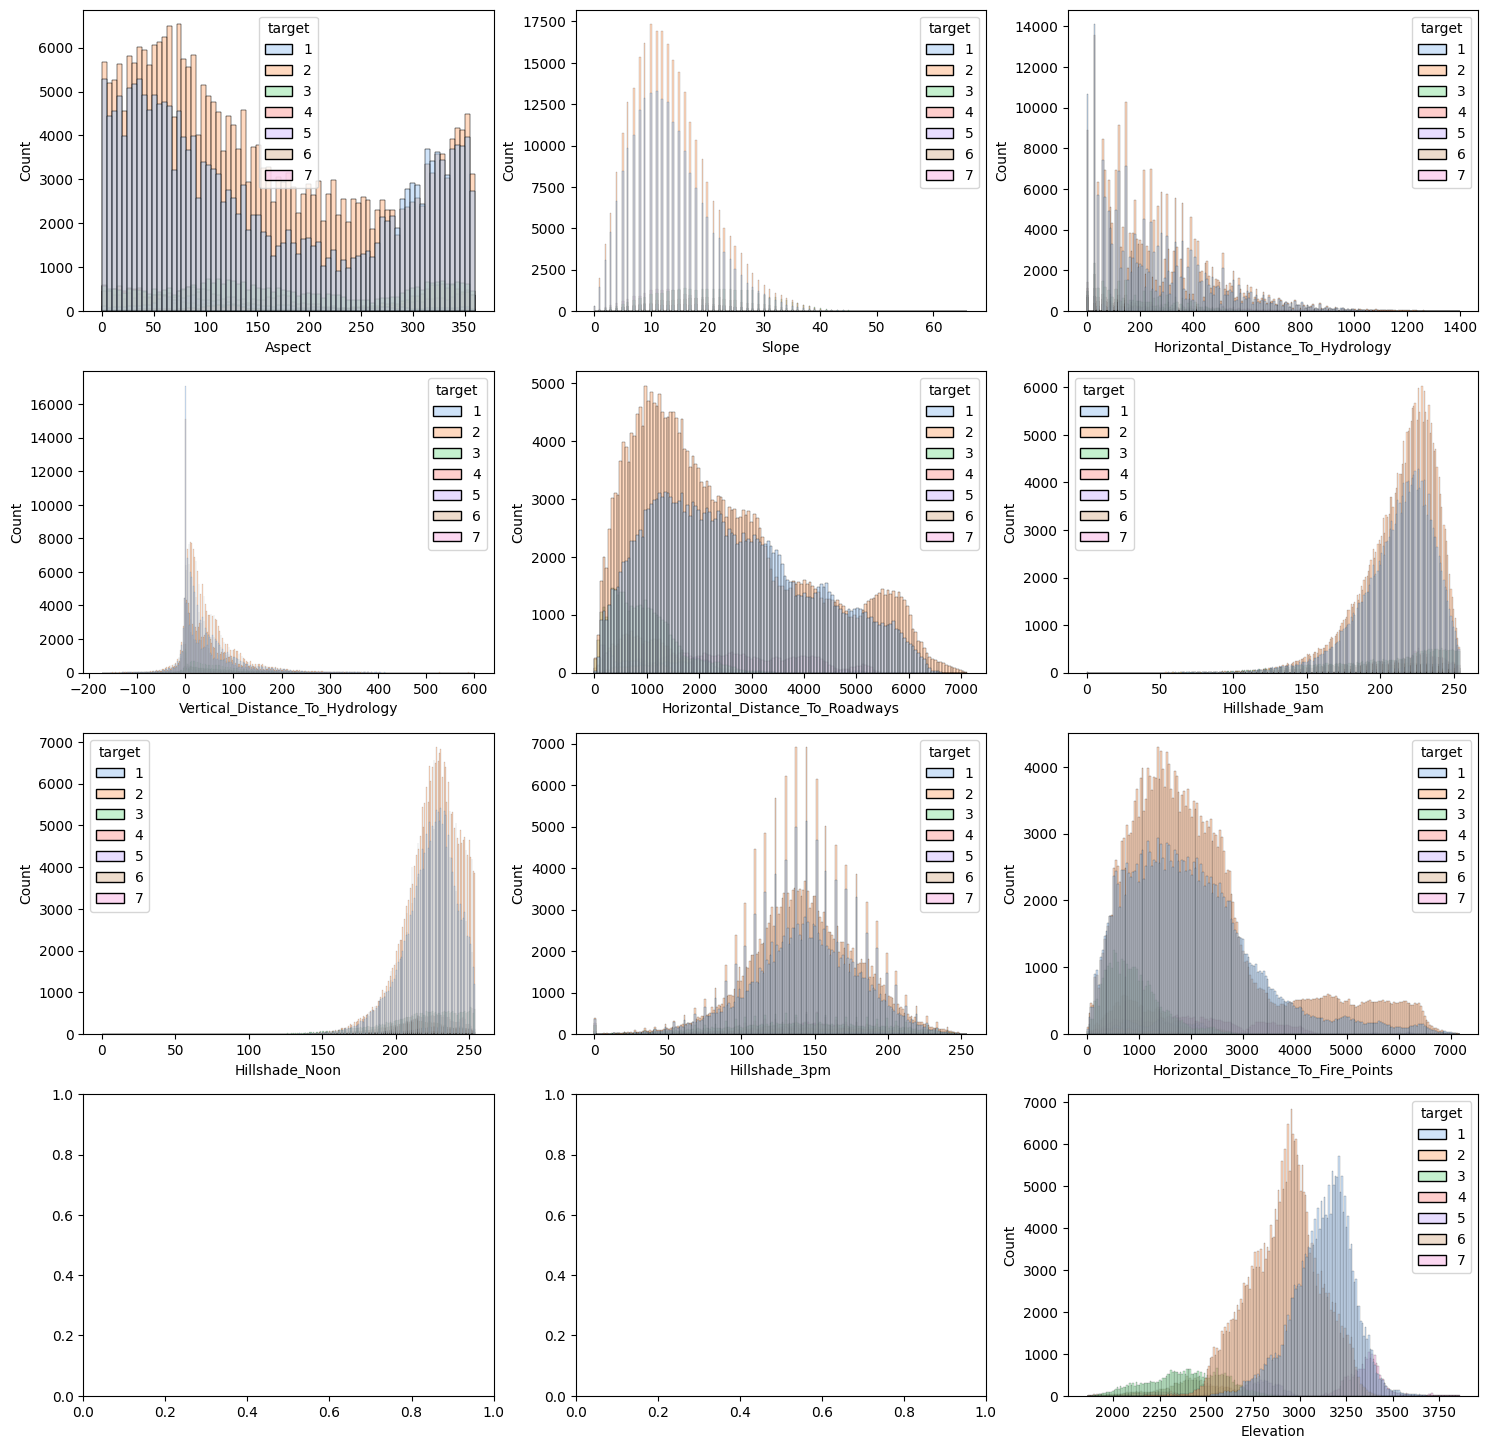

In [ ]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

fig, axes= plt.subplots(4, 3, figsize=(18, 18))
color_map = cm.get_cmap('tab10', lut=7)
for i in range(len(columns)):
  row = (i - 1) // 3
  col = (i - 1) % 3
  sns.histplot(covtype_df, x=columns[i], hue='target', ax=axes[row, col], palette='pastel')

### データセット作成

#### データセット（全てのデータを含む）

In [ ]:
# データを学習データと検証データ、テストデータに分割する
target_df = covtype_df[["target"]]                                # 目的変数
explanatory_df = covtype_df.drop("target", axis=1)                # 説明変数

# 今回はデータの数が多いため、テストデータは全体の1割とする
X_train_original, X_test_original, y_train, y_test = train_test_split(explanatory_df, target_df, test_size=0.1, random_state=1234, shuffle=True)
print('訓練データ （説明変数）：', X_train_original.shape)
print('訓練データ （目的変数）：', y_train.shape)
print('テストデータ （説明変数）：', X_test_original.shape)
print('テストデータ （目的変数）：', y_test.shape)

# インデックスを修正する
X_train_original = X_train_original.reset_index().drop("index", axis=1)
X_test_original = X_test_original.reset_index().drop("index", axis=1)
y_train = y_train.reset_index().drop("index", axis=1)
y_test = y_test.reset_index().drop("index", axis=1)

# クラスを1-7から0-6に変更する
y_train = y_train - 1
y_test = y_test - 1

訓練データ （説明変数）： (522910, 54)
訓練データ （目的変数）： (522910, 1)
テストデータ （説明変数）： (58102, 54)
テストデータ （目的変数）： (58102, 1)


#### データセット（フラグ変数の追加, データの正規分布近似, データの標準化）

In [ ]:
# データセットのコピー
explanatory_eng_df = explanatory_df.copy()

# フラグ変数を作成する
# Elevationは3000が境界線
# Horizontal_Distance_To_Roadwaysは1500が境界線
# Horizontal_Distance_To_Fire_Pointsは1500が境界線
explanatory_eng_df['Elevation_Flag'] = (explanatory_eng_df['Elevation'] >= 3000).astype(int)
explanatory_eng_df['Horizontal_Distance_To_Roadways_Flag'] = (explanatory_eng_df['Horizontal_Distance_To_Roadways'] >= 1500).astype(int)
explanatory_eng_df['Horizontal_Distance_To_Fire_Points_Flag'] = (explanatory_eng_df['Horizontal_Distance_To_Fire_Points'] >= 1500).astype(int)

# Vertical_Distance_To_Hydrologyの最低値を0にする
explanatory_eng_df['Vertical_Distance_To_Hydrology'] = explanatory_eng_df['Vertical_Distance_To_Hydrology'] - explanatory_eng_df['Vertical_Distance_To_Hydrology'].min()

# 正規分布に近似するようにデータにBox-Cox変換を適用する
# 0のデータをなくすために、データに1を足す
columns = ['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']
for column in columns:
  if explanatory_eng_df[column].min() == 0:
      explanatory_eng_df[column] += 1
  explanatory_eng_df[column], _ = stats.boxcox(explanatory_eng_df[column])

# 説明変数の標準化
scaler = StandardScaler()
explanatory_array = np.array(explanatory_eng_df)
scaled_data = scaler.fit_transform(explanatory_array)
explanatory_eng_df = pd.DataFrame(scaled_data, columns=explanatory_eng_df.columns)

# 訓練データの作成
X_train_eng, X_test_eng, _, _ = train_test_split(explanatory_eng_df, target_df, test_size=0.1, random_state=1234, shuffle=True)
X_train_eng = X_train_eng.reset_index(drop=True)
X_test_eng = X_test_eng.reset_index(drop=True)
print('訓練データ （説明変数）：', X_train_eng.shape)
print('訓練データ （目的変数）：', X_test_eng.shape)

訓練データ （説明変数）： (522910, 57)
訓練データ （目的変数）： (58102, 57)


<ipython-input-9-2d4635a94822>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', lut=7)


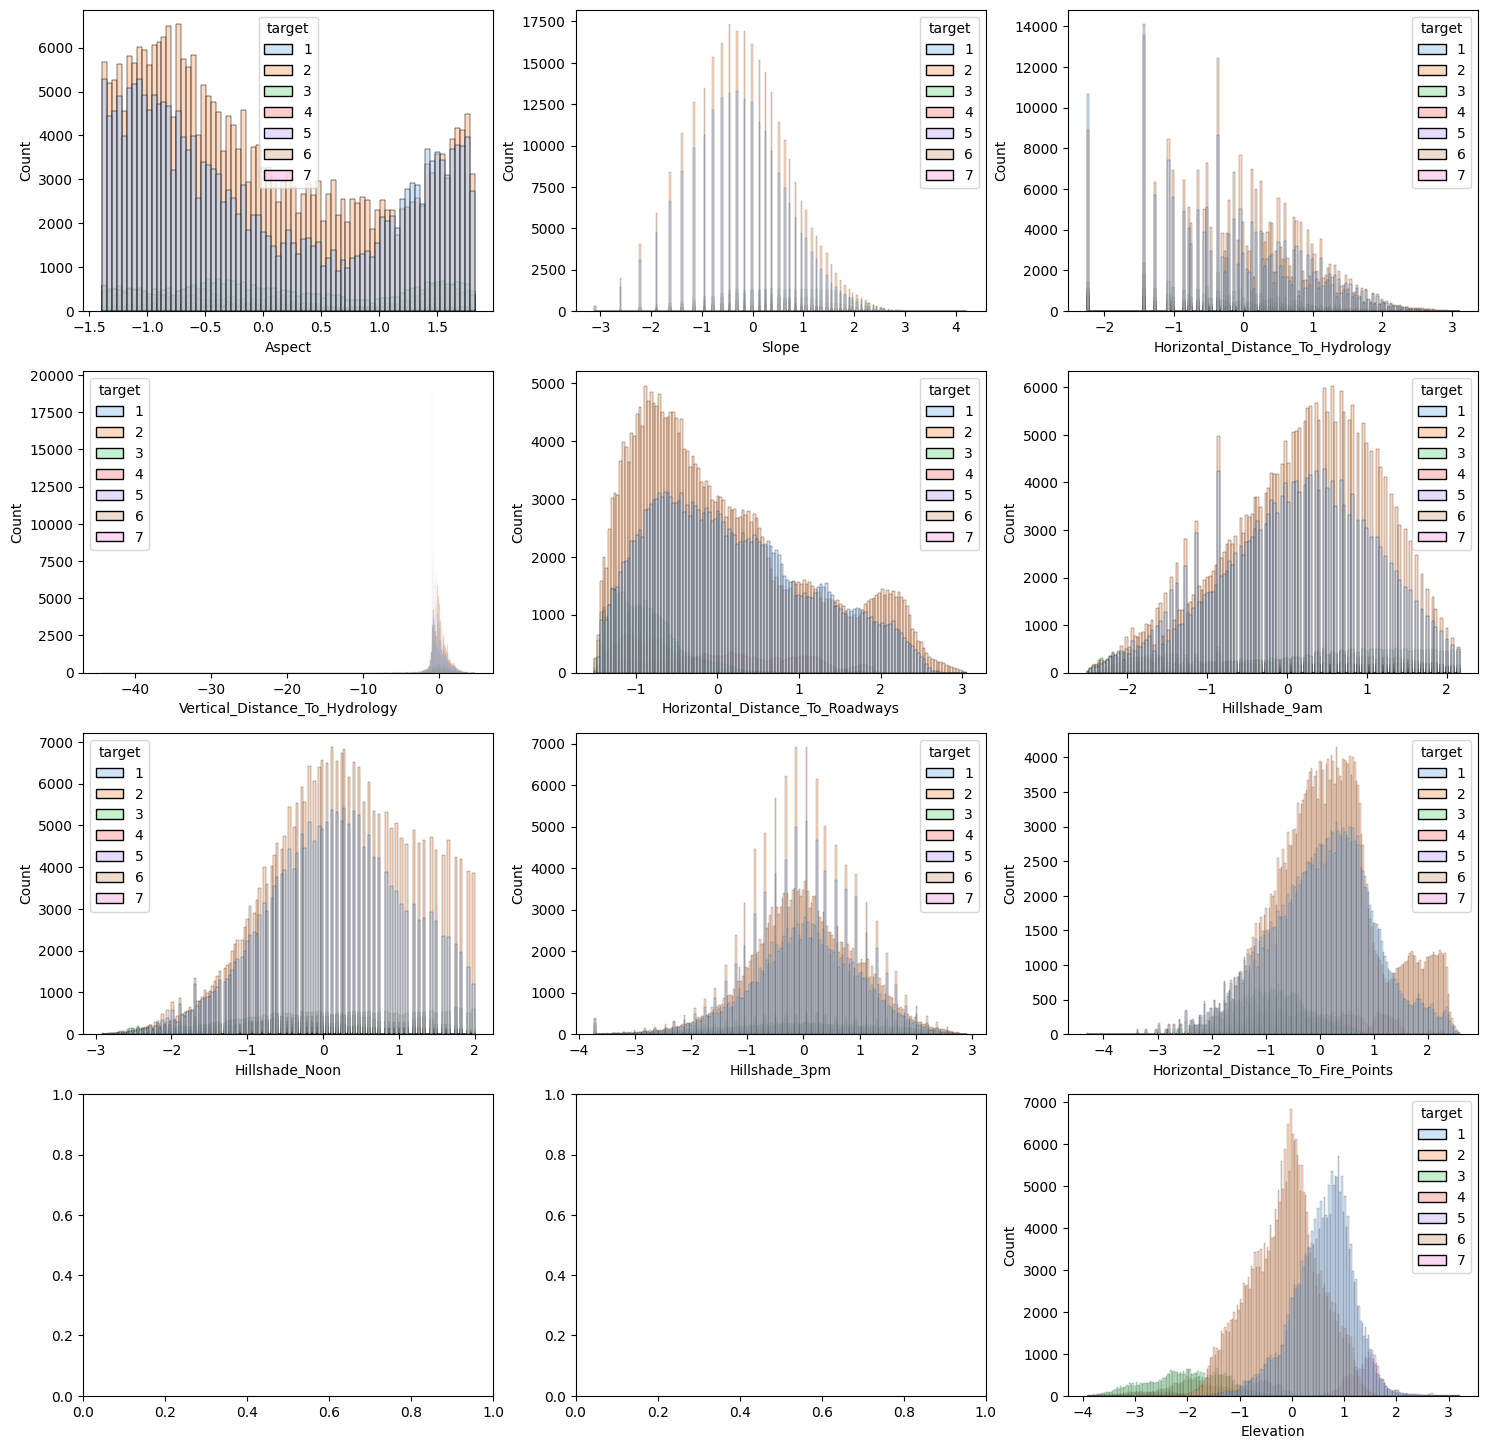

In [ ]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

fig, axes= plt.subplots(4, 3, figsize=(18, 18))
color_map = cm.get_cmap('tab10', lut=7)
for i in range(len(columns)):
  row = (i - 1) // 3
  col = (i - 1) % 3
  sns.histplot(explanatory_eng_df, x=columns[i], hue=target_df['target'], ax=axes[row, col], palette='pastel')

#### データセット（次元圧縮）

In [ ]:
# 主成分分析による次元圧縮
def apply_pca(data, n_components=10):
  pca = PCA(n_components=n_components, random_state=1234)
  data_pca = pca.fit_transform(data)
  data_pca_df = pd.DataFrame(data=data_pca)
  # 累積寄与率を計算
  explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
  print('次元圧縮前の次元数:', len(data.columns))
  print('次元圧縮後の次元数:', len(data_pca_df.columns))
  print('累積寄与率:', explained_variance_ratio_cumsum[-1])
  return data_pca_df

# 次元数は35（累積寄与率が80%を超える値を人手で探索）
n_components = 35
X_train_pca = apply_pca(data=X_train_eng, n_components=n_components)
print('-'*50)
X_test_pca = apply_pca(data=X_test_eng, n_components=n_components)
print('-'*50)

print('PCA後の訓練データ （説明変数）：', X_train_pca.shape)
print('PCA後のテストデータ （説明変数）：', X_test_pca.shape)

次元圧縮前の次元数: 57
次元圧縮後の次元数: 35
累積寄与率: 0.8055374891923012
--------------------------------------------------
次元圧縮前の次元数: 57
次元圧縮後の次元数: 35
累積寄与率: 0.8185866976499634
--------------------------------------------------
PCA後の訓練データ （説明変数）： (522910, 35)
PCA後のテストデータ （説明変数）： (58102, 35)


#### データセット（Filter Method）

In [ ]:
# LDA（線型判別解析）を用いたFilter Methodを適用する
def apply_filter_method_by_lda(X, y, n_components=10):
    lda = LDA(n_components=n_components)
    X_lda = lda.fit_transform(X, y)
    X_lda_df = pd.DataFrame(data=X_lda)
    return X_lda_df

X_train_filtered = apply_filter_method_by_lda(X=X_train_eng, y=y_train, n_components=5)
print('-'*50)
X_test_filtered = apply_filter_method_by_lda(X=X_test_eng, y=y_test, n_components=5)
print('-'*50)

print('PCA後の訓練データ （説明変数）：', X_train_filtered.shape)
print('PCA後のテストデータ （説明変数）：', X_test_filtered.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------------
PCA後の訓練データ （説明変数）： (522910, 5)
PCA後のテストデータ （説明変数）： (58102, 5)


### データセットをまとめる

In [ ]:
datasets = {
    "original": {
        "X_train": X_train_original,
        "X_test": X_test_original,
    },
    "eng": {
        "X_train": X_train_eng,
        "X_test": X_test_eng,
    },
    "pca": {
        "X_train": X_train_pca,
        "X_test": X_test_pca,
    },
    "filter_method": {
        "X_train": X_train_filtered,
        "X_test": X_test_filtered,
    },
    "y_train": y_train,
    "y_test": y_test
}

### モデルパラメータ

In [ ]:
params = {
    # LightGBM
    'lgb': {
        'objective': 'multiclass',
        'num_class': 7,
        'class_weight': 'balanced',
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    },
    # XGBoost
    'xgb': {
        'objective': 'multi:softmax',
        'num_class': 7,
        'class_weight': 'balanced',
        'scale_pos_weight': 1,
        'learning_rate': 0.05,
        #'max_depth': 5
    },
    # サポートベクターマシーン
    'svm': {
        'C': 1.0,
        'kernel': 'rbf',
        'gamma': 'scale',
        'class_weight':'balanced',
        'random_state':1234
    },
    # ロジスティック回帰
    'logreg': {
        'penalty': 'l2',
        'C': 1.0,
        'random_state': 1234,
        'max_iter': 100,
        'class_weight': 'balanced',
        'multi_class': 'multinomial',
        'solver': 'lbfgs'
    },
    # ランダムフォレスト
    'rf': {
        'class_weight': 'balanced',
        'n_estimators': 100,
        'criterion': 'gini',
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'random_state': 1234
    },
    # 決定木
    'dt': {
        'class_weight': 'balanced',
        'max_depth': 10,
        'random_state': 1234
    },
    # ニューラルネットワーク
    'nn': {
        'hidden_layer_sizes': (100,),
        'activation': 'relu',
        'solver': 'adam',
        'alpha': 0.0001,
        'batch_size': 'auto',
        'learning_rate': 'constant',
        'learning_rate_init': 0.001,
        'random_state': 1234,
    },
    # k最近傍法
    'knn': {
        'n_neighbors': 5,
        'weights': 'uniform',
        'p': 2
    }
}

### 8つの機械学習モデルを辞書で管理

In [ ]:
model_instances = {
    'lgb': LGBMClassifier(**params['lgb']),                 # LightGBM
    'xgb': XGBClassifier(**params['xgb']),                 # XGBoost
    'svm': SVC(**params['svm']),                         # サポートベクターマシーン
    'logreg': LogisticRegression(**params['logreg']),       # ロジスティック回帰
    'rf': RandomForestClassifier(**params['rf']),           # ランダムフォレスト
    'dt': DecisionTreeClassifier(**params['dt']),            # 決定木
    'nn': MLPClassifier(**params['nn']),                   # ニューラルネットワーク
    'knn': KNeighborsClassifier(**params['knn'])            # k最近傍法
}

### 機械学習モデルクラス
  - 訓練関数
  - テスト関数
  - 訓練 & テスト関数

In [ ]:
# データの種類（元データor次元圧縮データ）
class DataType:
  Original = 'original'
  Engeneered = "eng"
  PCA = 'pca'
  FilterMethod = 'filter_method'

In [ ]:
# 機械学習モデルクラス
class MLModel:
  def __init__(self, model_type):
    self.model = model_instances[model_type]
    self.model_type = model_type
    self.predictions = {}
    self.metrics = {}
    self.imps = {}

  # 訓練関数
  # 引数：モデルインスタンス, 訓練データタイプ（元データor次元圧縮データ）
  # 戻値：各エポックの予測結果、各特徴量の重要度
  def train(self, data_type):
    metric = []
    imp = pd.DataFrame()

    # データセットのセット
    X_train = datasets[data_type]['X_train']
    y_train = datasets['y_train']

    n_splits = 5
    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1234).split(X_train, y_train))

    for nfold in np.arange(n_splits):
      print('-'*20, nfold, '-'*20)

      # データの分割
      idx_train, idx_val = cv[nfold][0], cv[nfold][1]
      X_tr, y_tr = X_train.loc[idx_train, :], y_train.loc[idx_train, :]
      X_val, y_val = X_train.loc[idx_val, :], y_train.loc[idx_val, :]

      print('X_train shape:', X_tr.shape, 'y_train shape:', y_tr.shape)
      print('X_val shape:', X_val.shape, 'y_val shape:', y_val.shape)

      # モデルの訓練
      self.model.fit(X_tr, y_tr)

      # 予測
      y_tr_pred = self.model.predict(X_tr)
      y_val_pred = self.model.predict(X_val)

      # 予測結果の評価
      metric_train = self.calc_metrics(y_tr, y_tr_pred)
      metric_val = self.calc_metrics(y_val, y_val_pred)
      metric.append([nfold, metric_train, metric_val])

      if hasattr(self.model, 'feature_importances_'):
        _imp = pd.DataFrame({"col": X_train.columns, "imp": self.model.feature_importances_, "nfold": nfold})
      elif hasattr(self.model, 'coef_'):
        _imp = pd.DataFrame({"col": X_train.columns, "imp": self.model.coef_[0], "nfold": nfold})
      else:
        _imp = pd.DataFrame()
      imp = pd.concat([imp, _imp], axis=0, ignore_index=True)

    print('-'*20, 'train result', '-'*20)
    metric = np.array(metric)
    print(metric)

    print('Training Done.')

    return metric, imp


  # テスト関数
  # 引数： 訓練済みモデルインスタンス, 訓練データタイプ（元データor次元圧縮データ）
  # 戻値： スコア
  def test(self, data_type):
    # データセットをセット
    X_test = datasets[data_type]['X_test']
    y_test = datasets['y_test']
    print('X_test shape:', X_test.shape, 'y_test shape:', y_test.shape)

    y_pred = self.model.predict(X_test)      # 予測

    # 混同行列の表示
    self.show_confusion_matrix(y_test, y_pred)

    pred_df = pd.DataFrame(y_pred, columns=['pred'])    # 予測結果を保存
    file_name = self.model_type + '_' + data_type    # CSV保存時のファイル名
    pred_to_csv(pred_df, file_name, self.model_type)
    print('-'*20, 'test result', '-'*20)
    metrics = self.calc_metrics(y_test, y_pred)      # Accuracy Scoreを計算
    return metrics


  # 学習+テスト
  def train_and_test(self, data_type):
    # 訓練する
    metric, imp = self.train(data_type)
    # 予測する
    pred = self.test(data_type)

    # 各出力結果を辞書に格納
    self.predictions[data_type] = pred
    self.metrics[data_type] = metric
    self.imps[data_type] = imp

    # 結果をCSVで出力
    expanded_data = []
    for row in metric:
        fold = row[0]
        train_metrics = row[1]
        val_metrics = row[2]
        expanded_data.append([fold, 'train', *train_metrics])
        expanded_data.append([fold, 'val', *val_metrics])

    metrics_df = pd.DataFrame(expanded_data, columns=['fold', 'data_type', 'accuracy', 'recall', 'precision', 'f1'])
    test_data_row = pd.DataFrame([[5, 'test', *pred]], columns=['fold', 'data_type', 'accuracy', 'recall', 'precision', 'f1'])
    metrics_df = pd.concat([metrics_df, test_data_row], ignore_index=True)

    # 特徴量の重要度・予測精度を保存
    file_name = self.model_type + '_' + data_type    # CSV保存時のファイル名
    feature_importance_to_csv(imp, file_name, self.model_type)
    metrics_to_csv(metrics_df, file_name, self.model_type)
    print('saved results (' + self.model_type + ') as csv')


  # 評価指標の計算
  def calc_metrics(self, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print('accuracy_score: {:.3f}, recall_score: {:.3f}, precision_score: {:.3f}, f1_score: {:.3f}'.format(accuracy, recall, precision, f1))
    return [accuracy, recall, precision, f1]

  # 混同行列の表示
  def show_confusion_matrix(self, y_true, y_pred):
    print('-'*20, 'Confusion Matrix', '-'*20)
    y_true_array = np.array(y_true["target"])
    cm = confusion_matrix(y_true_array, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

### モデルのクラスインスタンスを辞書で管理

In [ ]:
model_classes = {
    'lgb': MLModel('lgb'),
    'xgb': MLModel('xgb'),
    'svm': MLModel('svm'),
    'logreg': MLModel('logreg'),
    'rf': MLModel('rf'),
    'dt': MLModel('dt'),
    'nn': MLModel('nn'),
    'knn': MLModel('knn')
}

### 結果データ保存関数

In [ ]:
# GoogleDriveにマウントするコード
def mount_google_drive():
  if not os.path.exists('/content/drive/'):
    drive.mount('/content/drive')

In [ ]:
# 日本の現在時刻を返す
def nowtime_jp():
  jst = pytz.timezone('Asia/Tokyo')
  now = datetime.now(jst)
  formatted_date_time = now.strftime("%Y%m%d-%H%M%S")
  return formatted_date_time

In [ ]:
# 特徴量の重要度をCSVで保存する
def feature_importance_to_csv(imp_df, file_name="", model_type=""):
  path = "/content/drive/MyDrive/Colab Notebooks/CA Teck Lounge/feature_importance/" + model_type + "/" + file_name + "_" + nowtime_jp() + ".csv"   # ファイル名：（ノートブックのフォルダパス）+（引数file_name）+（'yyyymmdd-hhmmss'形式の現在時刻）
  imp_df.to_csv(path)

In [ ]:
# モデルの学習・予測精度をCSVで保存する
def metrics_to_csv(metrics_df, file_name="", model_type=""):
  path = "/content/drive/MyDrive/Colab Notebooks/CA Teck Lounge/metrics/" + model_type + "/" + file_name + "_" + nowtime_jp() + ".csv"   # ファイル名：（ノートブックのフォルダパス）+（引数file_name）+（'yyyymmdd-hhmmss'形式の現在時刻）
  metrics_df.to_csv(path)

In [ ]:
# モデルのテストデータに対する予測結果をCSVで保存する
def pred_to_csv(metrics_df, file_name="", model_type=""):
  path = "/content/drive/MyDrive/Colab Notebooks/CA Teck Lounge/pred/" + model_type + "/" + file_name + "_" + nowtime_jp() + ".csv"   # ファイル名：（ノートブックのフォルダパス）+（引数file_name）+（'yyyymmdd-hhmmss'形式の現在時刻）
  metrics_df.to_csv(path)

# 適当な機械学習モデルでcross validation 及びそれによって生成されたテストデータに対する予測を実行して、結果と考察を確認する

#### 使用モデル：LightGBM

### LightGBM

In [ ]:
model_classes['lgb'].train_and_test(data_type=DataType.Original)

-------------------- 0 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.757, recall_score: 0.883, precision_score: 0.651, f1_score: 0.719
accuracy_score: 0.752, recall_score: 0.872, precision_score: 0.641, f1_score: 0.708
-------------------- 1 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.756, recall_score: 0.884, precision_score: 0.652, f1_score: 0.719
accuracy_score: 0.752, recall_score: 0.870, precision_score: 0.640, f1_score: 0.707
-------------------- 2 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.757, recall_score: 0.883, precision_score: 0.651, f1_score: 0.718
accuracy_score: 0.755, recall_score: 0.871, precision_score: 0.647, f1_score: 0.712
-------------------- 3 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.758, recall_score: 0.884, precision_score: 0.653, f1_score: 0.721
accuracy_score: 0.752, recall_score: 0.872, precision_score: 0.641, f1_score: 0.708
-------------------- 4 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


# 複数のアプローチを行ってみる

## アプローチ1: 特徴量エンジニアリングを行って精度が向上するか確認する

- データが正規分布に従っていないので、Box-Cox変換を行う
  
- Elevation,Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Pointsの3つの特徴量は、他の特徴量に比べて分布が分離しているため、境界線を設けてフラグ変数を作成する

- データ全体を標準化する

**モデルはLightGBM, ロジスティック回帰を使用する**

※ロジスティック回帰に関しては元データとの精度を比較するため、元データと特徴量エンジニアリングを行ったデータの両方を予測します。

#### LightGBM

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.756, recall_score: 0.883, precision_score: 0.649, f1_score: 0.717
accuracy_score: 0.750, recall_score: 0.872, precision_score: 0.639, f1_score: 0.706
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.758, recall_score: 0.884, precision_score: 0.652, f1_score: 0.720
accuracy_score: 0.755, recall_score: 0.870, precision_score: 0.642, f1_score: 0.709
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.756, recall_score: 0.884, precision_score: 0.650, f1_score: 0.718
accuracy_score: 0.754, recall_score: 0.871, precision_score: 0.645, f1_score: 0.711
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.758, recall_score: 0.884, precision_score: 0.653, f1_score: 0.721
accuracy_score: 0.752, recall_score: 0.872, precision_score: 0.641, f1_score: 0.708
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.757, recall_score: 0.884, precision_score: 0.650, f1_score: 0.718
accuracy_score: 0.754, recall_score: 0.873, precision_score: 0.643, f1_score: 0.710
-------------------- train result --------------------
[[0
  list([0.7555793539997323, 0.8828576492635677, 0.6494172824771006, 0.7173755569095382])
  list([0.750310760934004, 0.8718368572254579, 0.6390345384866895, 0.7064199903242478])]
 [1
  list([0.7575204146028953, 0.8839251107883376, 0.6522812252628994, 0.7200421636980473])
  list([0.754881337132585, 0.8702983019004776, 0.6419806209533888, 0.7086210077206859])]
 [2
  list([0.755775372435027, 0.8837032559920256, 0.6501230704910924, 0.7183086591891736])
  list([0.7536191696467843, 0.8707918533896254, 0.6454930803696781, 0.7114015701426473])]
 [3
  list([0.7576327666328814, 0.8838528108161959, 0.6532205928055078, 0.7205196692924316])
  list([0.7518

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.753, recall_score: 0.871, precision_score: 0.644, f1_score: 0.710
saved results (lgb) as csv


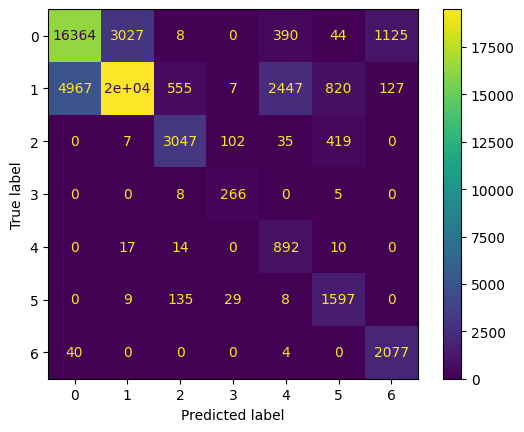

In [ ]:
model_classes['lgb'].train_and_test(data_type=DataType.Engeneered)

#### ロジスティック回帰

-------------------- 0 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.405, recall_score: 0.481, precision_score: 0.315, f1_score: 0.299
accuracy_score: 0.404, recall_score: 0.480, precision_score: 0.314, f1_score: 0.298
-------------------- 1 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.392, recall_score: 0.490, precision_score: 0.320, f1_score: 0.300
accuracy_score: 0.390, recall_score: 0.492, precision_score: 0.321, f1_score: 0.301
-------------------- 2 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.405, recall_score: 0.483, precision_score: 0.315, f1_score: 0.301
accuracy_score: 0.409, recall_score: 0.485, precision_score: 0.319, f1_score: 0.306
-------------------- 3 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.382, recall_score: 0.482, precision_score: 0.313, f1_score: 0.293
accuracy_score: 0.381, recall_score: 0.478, precision_score: 0.313, f1_score: 0.292
-------------------- 4 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.416, recall_score: 0.484, precision_score: 0.321, f1_score: 0.312
accuracy_score: 0.418, recall_score: 0.487, precision_score: 0.321, f1_score: 0.312
-------------------- train result --------------------
[[0
  list([0.4048904209137328, 0.4812274183346874, 0.31451376810796, 0.2986665067159981])
  list([0.40388403358130465, 0.4797062550467152, 0.31354449983973737, 0.2975385768991502])]
 [1
  list([0.3915396530951789, 0.4898394207510865, 0.3204436841435741, 0.2996480028447368])
  list([0.3900097531123903, 0.49192406389105514, 0.32133405349197214, 0.30052201713542903])]
 [2
  list([0.4051724962230594, 0.4830823737678211, 0.31474484311566303, 0.3012663166222637])
  list([0.40929605477041936, 0.4853448434945749, 0.3187643485776462, 0.3055479315427091])]
 [3
  list([0.3823387389799392, 0.4822110445185753, 0.3130266614429528, 0.2933763507044921])
  list([0.38132757071006484, 0.4775038307841161, 0.3128361977073066, 0.29229330140900245])]
 [4
  list([0.4160586907880897, 0.4842

<ipython-input-202-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.415, recall_score: 0.477, precision_score: 0.321, f1_score: 0.312
saved results (logreg) as csv


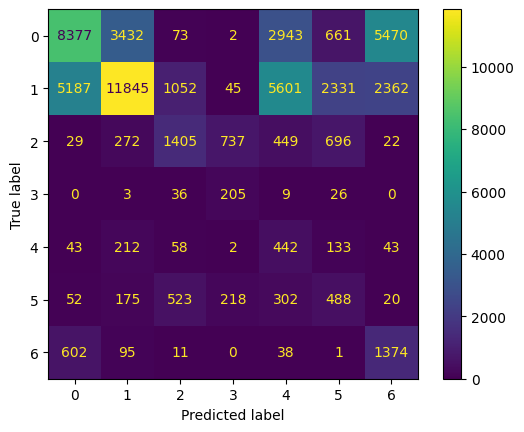

In [ ]:
model_classes['logreg'].train_and_test(data_type=DataType.Original)

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.719, precision_score: 0.479, f1_score: 0.512
accuracy_score: 0.584, recall_score: 0.716, precision_score: 0.478, f1_score: 0.509
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.585, recall_score: 0.717, precision_score: 0.478, f1_score: 0.510
accuracy_score: 0.586, recall_score: 0.720, precision_score: 0.480, f1_score: 0.512
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.718, precision_score: 0.478, f1_score: 0.511
accuracy_score: 0.587, recall_score: 0.717, precision_score: 0.480, f1_score: 0.512
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.585, recall_score: 0.718, precision_score: 0.480, f1_score: 0.512
accuracy_score: 0.584, recall_score: 0.713, precision_score: 0.476, f1_score: 0.508
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.717, precision_score: 0.479, f1_score: 0.511
accuracy_score: 0.587, recall_score: 0.719, precision_score: 0.478, f1_score: 0.512
-------------------- train result --------------------
[[0
  list([0.5862959209041709, 0.7186793014466349, 0.4791375008988714, 0.511568151378802])
  list([0.5839245759308486, 0.7160670534005505, 0.4776208776270245, 0.5088630018250384])]
 [1
  list([0.5848210017020137, 0.7174293390094616, 0.47761119272334834, 0.5098297389884248])
  list([0.5857126465357327, 0.7202231799100535, 0.47991743239629336, 0.5119594161537179])]
 [2
  list([0.5860807787190913, 0.7180951417424489, 0.478026642080625, 0.510891765402736])
  list([0.5868409477730393, 0.7170482691876792, 0.4795510950230871, 0.5122681131672575])]
 [3
  list([0.5853731999770515, 0.7183171450125097, 0.4801629647054789, 0.5124460313478038])
  list([0.5838958903061713, 0.7130049010810807, 0.47642470790429686, 0.5076773380049715])]
 [4
  list([0.5859564743454897, 0.71729014737

<ipython-input-202-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- test result --------------------
accuracy_score: 0.587, recall_score: 0.718, precision_score: 0.481, f1_score: 0.513
saved results (logreg) as csv


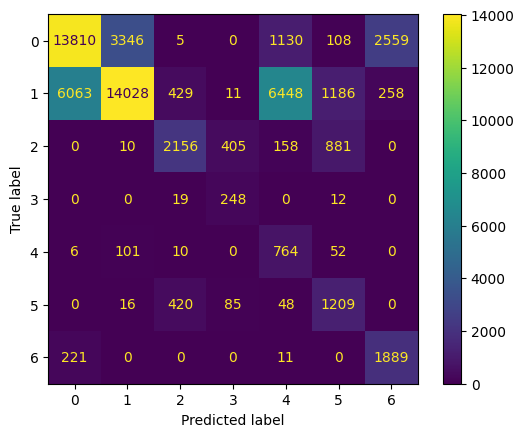

In [ ]:
model_classes['logreg'].train_and_test(data_type=DataType.Engeneered)

## アプローチ2: 8つの機械学習モデルを用いて、特徴量エンジニアリング後のデータを用いて学習・予測を行う

**特徴量エンジニアリング後のデータを使用する理由**

データの分布を正規分布に近づけ標準化を行なったデータの方が、ロジスティック回帰のように著しく予測結果が悪くなる可能性が低いと考えられるため

（文献などを見る限り、今回使用したモデルはロジスティック回帰以外比較的データの歪みなどの影響は少ないとされていたが、精度が向上する可能性もあるとされていた）

### LightGBM

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.756, recall_score: 0.883, precision_score: 0.649, f1_score: 0.717
accuracy_score: 0.750, recall_score: 0.872, precision_score: 0.639, f1_score: 0.706
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.758, recall_score: 0.884, precision_score: 0.652, f1_score: 0.720
accuracy_score: 0.755, recall_score: 0.870, precision_score: 0.642, f1_score: 0.709
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.756, recall_score: 0.884, precision_score: 0.650, f1_score: 0.718
accuracy_score: 0.754, recall_score: 0.871, precision_score: 0.645, f1_score: 0.711
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.758, recall_score: 0.884, precision_score: 0.653, f1_score: 0.721
accuracy_score: 0.752, recall_score: 0.872, precision_score: 0.641, f1_score: 0.708
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.757, recall_score: 0.884, precision_score: 0.650, f1_score: 0.718
accuracy_score: 0.754, recall_score: 0.873, precision_score: 0.643, f1_score: 0.710
-------------------- train result --------------------
[[0
  list([0.7555793539997323, 0.8828576492635677, 0.6494172824771006, 0.7173755569095382])
  list([0.750310760934004, 0.8718368572254579, 0.6390345384866895, 0.7064199903242478])]
 [1
  list([0.7575204146028953, 0.8839251107883376, 0.6522812252628994, 0.7200421636980473])
  list([0.754881337132585, 0.8702983019004776, 0.6419806209533888, 0.7086210077206859])]
 [2
  list([0.755775372435027, 0.8837032559920256, 0.6501230704910924, 0.7183086591891736])
  list([0.7536191696467843, 0.8707918533896254, 0.6454930803696781, 0.7114015701426473])]
 [3
  list([0.7576327666328814, 0.8838528108161959, 0.6532205928055078, 0.7205196692924316])
  list([0.7518

<ipython-input-16-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.753, recall_score: 0.871, precision_score: 0.644, f1_score: 0.710
saved results (lgb) as csv


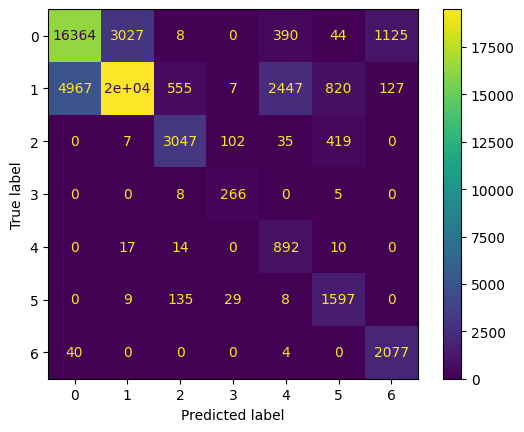

In [ ]:
model_classes['lgb'].train_and_test(data_type=DataType.Engeneered)

### XGBoost

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)
[15:55:25] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

accuracy_score: 0.793, recall_score: 0.671, precision_score: 0.824, f1_score: 0.713
accuracy_score: 0.789, recall_score: 0.663, precision_score: 0.815, f1_score: 0.705
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)
[16:06:43] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

accuracy_score: 0.793, recall_score: 0.674, precision_score: 0.826, f1_score: 0.716
accuracy_score: 0.789, recall_score: 0.656, precision_score: 0.809, f1_score: 0.697
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (10458

<ipython-input-18-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.792, recall_score: 0.659, precision_score: 0.811, f1_score: 0.702
saved results (xgb) as csv


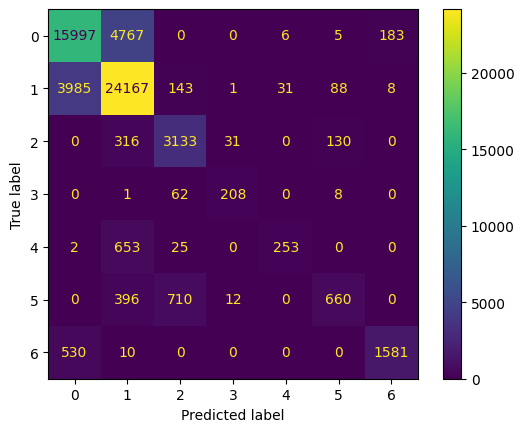

In [ ]:
model_classes['xgb'].train_and_test(data_type=DataType.Engeneered)

### SVM

In [ ]:
model_classes['svm'].train_and_test(data_type=DataType.Engeneered)

-------------------- 0 --------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ロジスティック回帰

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.719, precision_score: 0.479, f1_score: 0.512
accuracy_score: 0.584, recall_score: 0.716, precision_score: 0.478, f1_score: 0.509
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.585, recall_score: 0.717, precision_score: 0.478, f1_score: 0.510
accuracy_score: 0.586, recall_score: 0.720, precision_score: 0.480, f1_score: 0.512
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.718, precision_score: 0.478, f1_score: 0.511
accuracy_score: 0.587, recall_score: 0.717, precision_score: 0.480, f1_score: 0.512
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.585, recall_score: 0.718, precision_score: 0.480, f1_score: 0.512
accuracy_score: 0.584, recall_score: 0.713, precision_score: 0.476, f1_score: 0.508
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.586, recall_score: 0.717, precision_score: 0.479, f1_score: 0.511
accuracy_score: 0.587, recall_score: 0.719, precision_score: 0.478, f1_score: 0.512
-------------------- train result --------------------
[[0
  list([0.5862959209041709, 0.7186793014466349, 0.4791375008988714, 0.511568151378802])
  list([0.5839245759308486, 0.7160670534005505, 0.4776208776270245, 0.5088630018250384])]
 [1
  list([0.5848210017020137, 0.7174293390094616, 0.47761119272334834, 0.5098297389884248])
  list([0.5857126465357327, 0.7202231799100535, 0.47991743239629336, 0.5119594161537179])]
 [2
  list([0.5860807787190913, 0.7180951417424489, 0.478026642080625, 0.510891765402736])
  list([0.5868409477730393, 0.7170482691876792, 0.4795510950230871, 0.5122681131672575])]
 [3
  list([0.5853731999770515, 0.7183171450125097, 0.4801629647054789, 0.5124460313478038])
  list([0.5838958903061713, 0.7130049010810807, 0.47642470790429686, 0.5076773380049715])]
 [4
  list([0.5859564743454897, 0.71729014737

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.587, recall_score: 0.718, precision_score: 0.481, f1_score: 0.513
saved results (logreg) as csv


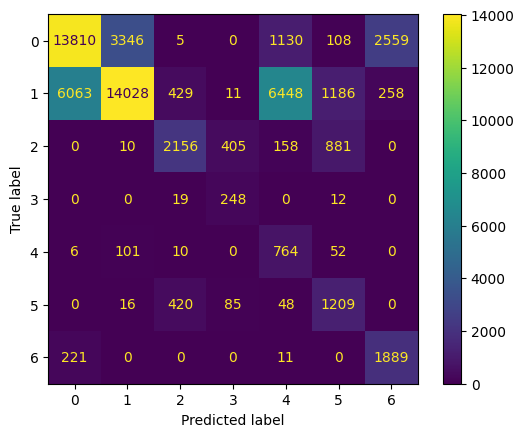

In [ ]:
model_classes['logreg'].train_and_test(data_type=DataType.Engeneered)

### ランダムフォレスト

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


<ipython-input-229-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.644, recall_score: 0.815, precision_score: 0.553, f1_score: 0.605
accuracy_score: 0.641, recall_score: 0.812, precision_score: 0.547, f1_score: 0.600
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


<ipython-input-229-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.637, recall_score: 0.814, precision_score: 0.546, f1_score: 0.598
accuracy_score: 0.634, recall_score: 0.801, precision_score: 0.539, f1_score: 0.589
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


<ipython-input-229-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.643, recall_score: 0.816, precision_score: 0.547, f1_score: 0.600
accuracy_score: 0.641, recall_score: 0.807, precision_score: 0.545, f1_score: 0.597
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


<ipython-input-229-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.645, recall_score: 0.815, precision_score: 0.548, f1_score: 0.601
accuracy_score: 0.640, recall_score: 0.802, precision_score: 0.541, f1_score: 0.592
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


<ipython-input-229-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.638, recall_score: 0.813, precision_score: 0.546, f1_score: 0.598
accuracy_score: 0.635, recall_score: 0.804, precision_score: 0.538, f1_score: 0.589
-------------------- train result --------------------
[[0
  list([0.6438751410376546, 0.8147425959862533, 0.5528172366668804, 0.6054085365679193])
  list([0.6410567784131113, 0.8117808715872127, 0.5474815347573473, 0.5997829350230871])]
 [1
  list([0.6372941806429405, 0.8138087483925229, 0.5461642289566442, 0.597649054241597])
  list([0.6337706297450804, 0.8013067189447073, 0.5393714398518809, 0.5892150805848448])]
 [2
  list([0.6433109904190013, 0.8164755842327651, 0.5467514402370256, 0.6001946732840883])
  list([0.6411141496624658, 0.8067870570159991, 0.5451591586069836, 0.5973259947423283])]
 [3
  list([0.6449556329004992, 0.8154925065816518, 0.5483495569270297, 0.60125759420914])
  list([0.6404735040446731, 0.8019076608959992, 0.5409881109650743, 0.5921131348129186])]
 [4
  list([0.6380663020405041, 0.81336104946738

<ipython-input-229-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.635, recall_score: 0.801, precision_score: 0.541, f1_score: 0.591
saved results (rf) as csv


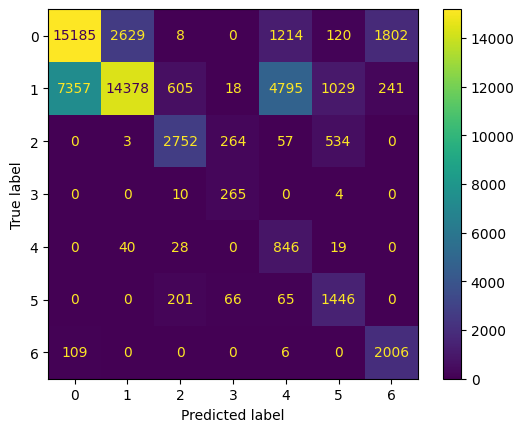

In [ ]:
model_classes['rf'].train_and_test(data_type=DataType.Engeneered)

### 決定木

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)
accuracy_score: 0.678, recall_score: 0.804, precision_score: 0.565, f1_score: 0.620
accuracy_score: 0.672, recall_score: 0.794, precision_score: 0.553, f1_score: 0.608
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)
accuracy_score: 0.655, recall_score: 0.799, precision_score: 0.553, f1_score: 0.603
accuracy_score: 0.652, recall_score: 0.785, precision_score: 0.547, f1_score: 0.595
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)
accuracy_score: 0.656, recall_score: 0.802, precision_score: 0.555, f1_score: 0.602
accuracy_score: 0.652, recall_score: 0.785, precision_score: 0.548, f1_score: 0.592
-------------------- 3 --------------------
X_

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- test result --------------------
accuracy_score: 0.662, recall_score: 0.784, precision_score: 0.553, f1_score: 0.599
saved results (dt) as csv


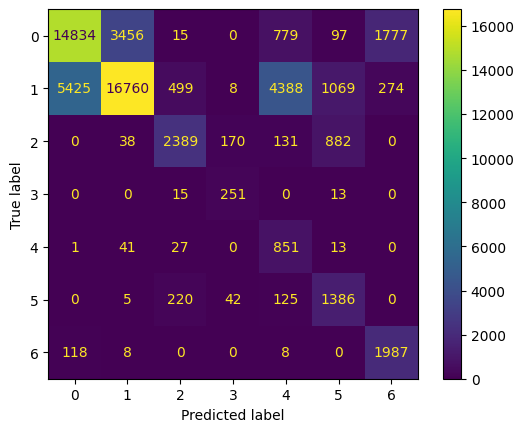

In [ ]:
model_classes['dt'].train_and_test(data_type=DataType.Engeneered)

### ニューラルネットワーク

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.878, recall_score: 0.820, precision_score: 0.832, f1_score: 0.824
accuracy_score: 0.871, recall_score: 0.808, precision_score: 0.821, f1_score: 0.812
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.876, recall_score: 0.801, precision_score: 0.857, f1_score: 0.819
accuracy_score: 0.873, recall_score: 0.788, precision_score: 0.843, f1_score: 0.806
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.878, recall_score: 0.816, precision_score: 0.841, f1_score: 0.826
accuracy_score: 0.873, recall_score: 0.806, precision_score: 0.833, f1_score: 0.816
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.877, recall_score: 0.808, precision_score: 0.854, f1_score: 0.829
accuracy_score: 0.872, recall_score: 0.802, precision_score: 0.847, f1_score: 0.822
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.878, recall_score: 0.812, precision_score: 0.841, f1_score: 0.824
accuracy_score: 0.873, recall_score: 0.804, precision_score: 0.832, f1_score: 0.816
-------------------- train result --------------------
[[0
  list([0.8775888776271251, 0.8196931742296584, 0.8324776405949553, 0.8240364345852369])
  list([0.8714884014457555, 0.8076404995478021, 0.8207320880868947, 0.8121151950492517])]
 [1
  list([0.8759657493641353, 0.8009168795648544, 0.8572708439948596, 0.8192018327885165])
  list([0.8732095389263926, 0.7882537244172756, 0.842546877769819, 0.805721552003417])]
 [2
  list([0.8782438660572565, 0.8164632396114493, 0.8409572880545644, 0.8257852658230113])
  list([0.8726549501826318, 0.8060039966159932, 0.8328998597912445, 0.8163143962427843])]
 [3
  list([0.8773522212235375, 0.8080646886446078, 0.8542612234403191, 0.828536509304146])
  list([0.8720429901895164, 0.8016114786104767, 0.8472364302936264, 0.8219465631481564])]
 [4
  list([0.8784613987110592, 0.81172387259291

<ipython-input-18-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.875, recall_score: 0.801, precision_score: 0.835, f1_score: 0.816
saved results (nn) as csv


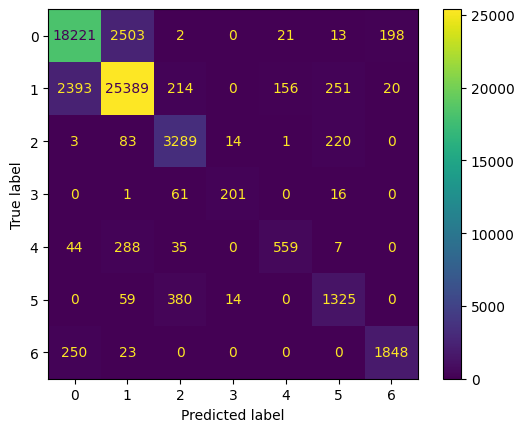

In [ ]:
model_classes['nn'].train_and_test(data_type=DataType.Engeneered)

### k-最近傍法

-------------------- 0 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.954, recall_score: 0.917, precision_score: 0.936, f1_score: 0.926
accuracy_score: 0.926, recall_score: 0.873, precision_score: 0.897, f1_score: 0.884
-------------------- 1 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.954, recall_score: 0.917, precision_score: 0.937, f1_score: 0.926
accuracy_score: 0.927, recall_score: 0.865, precision_score: 0.885, f1_score: 0.875
-------------------- 2 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.954, recall_score: 0.918, precision_score: 0.936, f1_score: 0.927
accuracy_score: 0.925, recall_score: 0.868, precision_score: 0.894, f1_score: 0.880
-------------------- 3 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.954, recall_score: 0.916, precision_score: 0.934, f1_score: 0.925
accuracy_score: 0.925, recall_score: 0.871, precision_score: 0.895, f1_score: 0.882
-------------------- 4 --------------------
X_train shape: (418328, 57) y_train shape: (418328, 1)
X_val shape: (104582, 57) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.954, recall_score: 0.914, precision_score: 0.935, f1_score: 0.924
accuracy_score: 0.925, recall_score: 0.870, precision_score: 0.897, f1_score: 0.883
-------------------- train result --------------------
[[0
  list([0.953873515518923, 0.9172495021970718, 0.9359799891434514, 0.9263124506739293])
  list([0.9264596202023293, 0.8725984254311092, 0.8973994765098475, 0.8843654699098323])]
 [1
  list([0.9535986116157656, 0.9165166436033042, 0.9366771101789196, 0.9262252262407078])
  list([0.926564800826146, 0.8647997141917445, 0.8851893162177065, 0.8745242104341635])]
 [2
  list([0.9543253141075903, 0.9182333909825159, 0.9356000785991413, 0.9266501355420981])
  list([0.9245185595991662, 0.8679365591613593, 0.8939098895057647, 0.8802756470106571])]
 [3
  list([0.9535340689602417, 0.9157282196049398, 0.9340047144415075, 0.9245678527608864])
  list([0.9252643858407756, 0.8709314530758625, 0.8946995627178532, 0.8823280349905306])]
 [4
  list([0.9536559828651202, 0.9144767636036

<ipython-input-15-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.927, recall_score: 0.863, precision_score: 0.894, f1_score: 0.878
saved results (knn) as csv


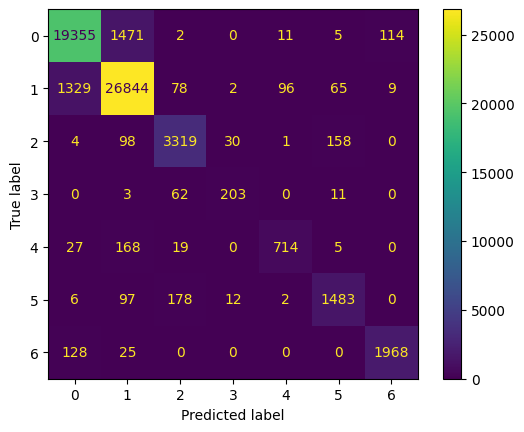

In [ ]:
model_classes['knn'].train_and_test(data_type=DataType.Engeneered)

## アプローチ3: 8つの機械学習モデルを用いて、LDAを用いたFilter Methodを適用したデータを説明変数として学習・予測を行う

### LightGBM

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.640, recall_score: 0.793, precision_score: 0.529, f1_score: 0.583
accuracy_score: 0.638, recall_score: 0.777, precision_score: 0.522, f1_score: 0.573
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.640, recall_score: 0.793, precision_score: 0.530, f1_score: 0.583
accuracy_score: 0.637, recall_score: 0.773, precision_score: 0.522, f1_score: 0.572
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
accuracy_score: 0.642, recall_score: 0.795, precision_score: 0.529, f1_score: 0.583
accuracy_score: 0.639, recall_score: 0.775, precision_score: 0.522, f1_score: 0.573
-------------------- 3 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


accuracy_score: 0.639, recall_score: 0.793, precision_score: 0.529, f1_score: 0.582
accuracy_score: 0.635, recall_score: 0.776, precision_score: 0.521, f1_score: 0.571
-------------------- 4 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


accuracy_score: 0.642, recall_score: 0.794, precision_score: 0.533, f1_score: 0.586
accuracy_score: 0.636, recall_score: 0.776, precision_score: 0.522, f1_score: 0.573
-------------------- train result --------------------
[[0
  list([0.6403061712340555, 0.7934506774687385, 0.5294705131340572, 0.5830234270752477])
  list([0.6380256640722113, 0.7766514674676347, 0.5221905285657659, 0.5730129287772352])]
 [1
  list([0.6400073626436672, 0.7927506021271709, 0.5303165226896213, 0.5832515741418526])
  list([0.6374328278288807, 0.7731081561583754, 0.5219115547666038, 0.5720574445491674])]
 [2
  list([0.6416878621560116, 0.7946525821098843, 0.529197920264807, 0.582956367771162])
  list([0.6387045571895738, 0.7749236595476734, 0.521977749108445, 0.5733418476421699])]
 [3
  list([0.6385563481287411, 0.7926131226756272, 0.5289713992977763, 0.5816542216922667])
  list([0.6348224359832476, 0.7763949304953647, 0.5214549757153509, 0.5714687161805478])]
 [4
  list([0.6419890612151231, 0.79447231195916

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.634, recall_score: 0.709, precision_score: 0.483, f1_score: 0.531
saved results (lgb) as csv


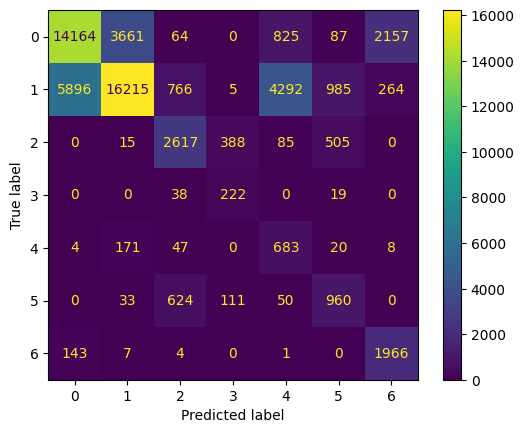

In [ ]:
model_classes['lgb'].train_and_test(data_type=DataType.FilterMethod)

### XGBoost

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
[01:32:13] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

accuracy_score: 0.748, recall_score: 0.582, precision_score: 0.775, f1_score: 0.612
accuracy_score: 0.743, recall_score: 0.565, precision_score: 0.745, f1_score: 0.596
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
[01:38:33] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight", "scale_pos_weight" } are not used.

accuracy_score: 0.748, recall_score: 0.583, precision_score: 0.776, f1_score: 0.614
accuracy_score: 0.745, recall_score: 0.572, precision_score: 0.767, f1_score: 0.602
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-16-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.736, recall_score: 0.521, precision_score: 0.727, f1_score: 0.533
saved results (xgb) as csv


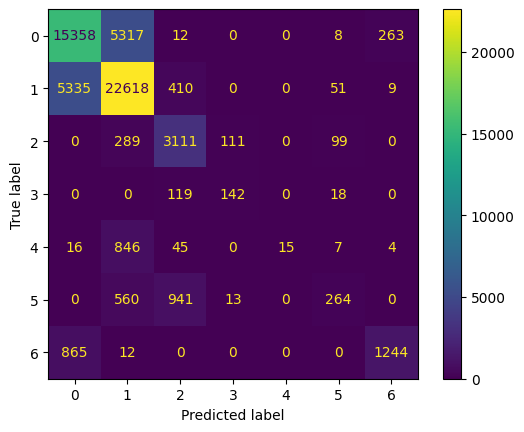

In [ ]:
model_classes['xgb'].train_and_test(data_type=DataType.FilterMethod)

### SVM

In [ ]:
model_classes['svm'].train_and_test(data_type=DataType.FilterMethod)

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ロジスティック回帰

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.526, recall_score: 0.636, precision_score: 0.449, f1_score: 0.460
accuracy_score: 0.527, recall_score: 0.635, precision_score: 0.449, f1_score: 0.460
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.526, recall_score: 0.636, precision_score: 0.449, f1_score: 0.460
accuracy_score: 0.526, recall_score: 0.639, precision_score: 0.449, f1_score: 0.460
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.527, recall_score: 0.637, precision_score: 0.449, f1_score: 0.460
accuracy_score: 0.528, recall_score: 0.636, precision_score: 0.450, f1_score: 0.461
-------------------- 3 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.527, recall_score: 0.638, precision_score: 0.450, f1_score: 0.462
accuracy_score: 0.526, recall_score: 0.635, precision_score: 0.449, f1_score: 0.459
-------------------- 4 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.528, recall_score: 0.636, precision_score: 0.450, f1_score: 0.461
accuracy_score: 0.528, recall_score: 0.636, precision_score: 0.449, f1_score: 0.460
-------------------- train result --------------------
[[0
  list([0.526417069859058, 0.6363346534130822, 0.44853060007157275, 0.4596166996683061])
  list([0.5265150790767054, 0.635345767265286, 0.4494563626137884, 0.4600129882865217])]
 [1
  list([0.5264911743894742, 0.6357864666391162, 0.4492858459941557, 0.4600400063425875])
  list([0.5263142797039644, 0.6391160655284001, 0.4494504865207794, 0.4604913703614429])]
 [2
  list([0.526797154386032, 0.6374842900255392, 0.4493710297531638, 0.4604446159172682])
  list([0.5279971696850319, 0.6361590327672543, 0.4496564378578892, 0.4611685727149628])]
 [3
  list([0.5271389914134363, 0.6375287054282496, 0.4501606388193728, 0.46156770968201394])
  list([0.5259700522078369, 0.6350085250160238, 0.44916349324850885, 0.4594209880826064])]
 [4
  list([0.527755732343998, 0.636209980166

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- test result --------------------
accuracy_score: 0.528, recall_score: 0.631, precision_score: 0.451, f1_score: 0.462
saved results (logreg) as csv


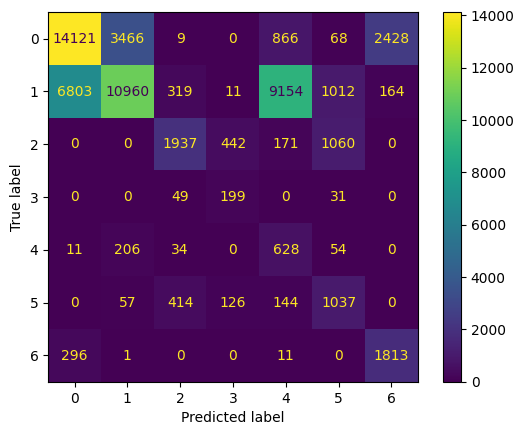

In [ ]:
model_classes['logreg'].train_and_test(data_type=DataType.FilterMethod)

### ランダムフォレスト

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-14-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.640, recall_score: 0.785, precision_score: 0.539, f1_score: 0.589
accuracy_score: 0.636, recall_score: 0.767, precision_score: 0.529, f1_score: 0.577
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-14-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.635, recall_score: 0.787, precision_score: 0.541, f1_score: 0.590
accuracy_score: 0.630, recall_score: 0.762, precision_score: 0.529, f1_score: 0.575
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-14-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.636, recall_score: 0.783, precision_score: 0.536, f1_score: 0.585
accuracy_score: 0.633, recall_score: 0.761, precision_score: 0.530, f1_score: 0.576
-------------------- 3 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-14-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.638, recall_score: 0.785, precision_score: 0.540, f1_score: 0.588
accuracy_score: 0.632, recall_score: 0.766, precision_score: 0.529, f1_score: 0.575
-------------------- 4 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


<ipython-input-14-3894cc014044>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_tr, y_tr)


accuracy_score: 0.636, recall_score: 0.784, precision_score: 0.540, f1_score: 0.589
accuracy_score: 0.629, recall_score: 0.764, precision_score: 0.530, f1_score: 0.577
-------------------- train result --------------------
[[0
  list([0.639847201239219, 0.7845606972662796, 0.5389671981757075, 0.5892808723810127])
  list([0.6357212522231359, 0.7669708051365314, 0.5289679024337618, 0.5769868723496788])]
 [1
  list([0.6345594844237058, 0.7865556220177944, 0.5413462542281567, 0.5904050190215226])
  list([0.6297737660400451, 0.7618735735198385, 0.5287753155043021, 0.5746088307739728])]
 [2
  list([0.6358407756592913, 0.7834409841432407, 0.5360928884493725, 0.5853760688767254])
  list([0.6334550878736303, 0.7611883790757065, 0.529553889566584, 0.5761067944974722])]
 [3
  list([0.6375021514218508, 0.7852315004525906, 0.5396939211769772, 0.5883337069673148])
  list([0.6322120441376144, 0.7661921431310476, 0.5290604808366833, 0.5749790054188502])]
 [4
  list([0.6359555181580004, 0.7842436035147

<ipython-input-14-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.628, recall_score: 0.705, precision_score: 0.486, f1_score: 0.531
saved results (rf) as csv


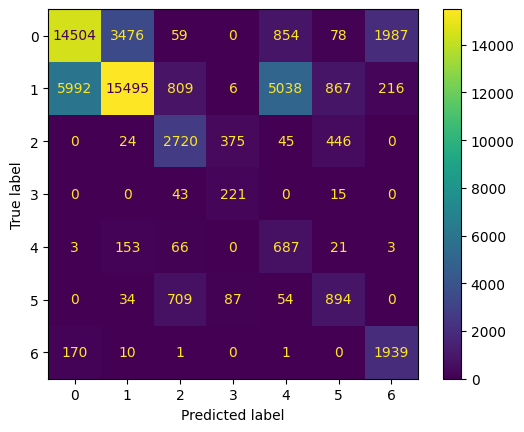

In [ ]:
model_classes['rf'].train_and_test(data_type=DataType.FilterMethod)

### 決定木

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
accuracy_score: 0.641, recall_score: 0.766, precision_score: 0.519, f1_score: 0.574
accuracy_score: 0.636, recall_score: 0.743, precision_score: 0.508, f1_score: 0.561
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
accuracy_score: 0.633, recall_score: 0.757, precision_score: 0.520, f1_score: 0.568
accuracy_score: 0.627, recall_score: 0.735, precision_score: 0.510, f1_score: 0.554
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
accuracy_score: 0.630, recall_score: 0.765, precision_score: 0.521, f1_score: 0.569
accuracy_score: 0.626, recall_score: 0.742, precision_score: 0.514, f1_score: 0.558
-------------------- 3 --------------------
X_train 

<ipython-input-265-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- test result --------------------
accuracy_score: 0.597, recall_score: 0.677, precision_score: 0.482, f1_score: 0.518
saved results (dt) as csv


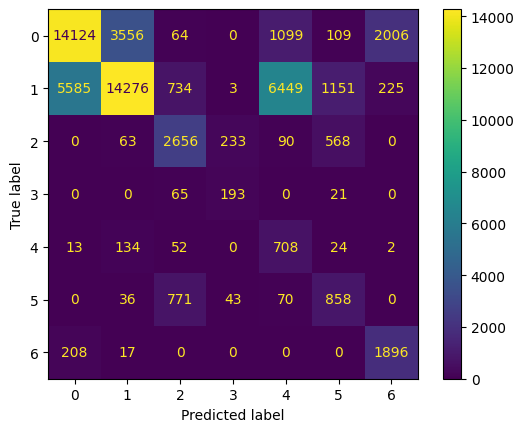

In [ ]:
model_classes['dt'].train_and_test(data_type=DataType.FilterMethod)

### ニューラルネットワーク

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.747, recall_score: 0.578, precision_score: 0.689, f1_score: 0.587
accuracy_score: 0.744, recall_score: 0.573, precision_score: 0.684, f1_score: 0.583
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score: 0.748, recall_score: 0.576, precision_score: 0.707, f1_score: 0.606
accuracy_score: 0.747, recall_score: 0.573, precision_score: 0.705, f1_score: 0.601
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score: 0.747, recall_score: 0.576, precision_score: 0.705, f1_score: 0.596
accuracy_score: 0.749, recall_score: 0.574, precision_score: 0.705, f1_score: 0.595
-------------------- 3 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy_score: 0.743, recall_score: 0.571, precision_score: 0.703, f1_score: 0.606
accuracy_score: 0.741, recall_score: 0.569, precision_score: 0.703, f1_score: 0.605
-------------------- 4 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score: 0.747, recall_score: 0.600, precision_score: 0.660, f1_score: 0.607
accuracy_score: 0.745, recall_score: 0.592, precision_score: 0.658, f1_score: 0.602
-------------------- train result --------------------
[[0
  list([0.7465433822263869, 0.5778622646540956, 0.6885334109016509, 0.5867810974745353])
  list([0.7442389703773116, 0.5730325894707654, 0.6839414085775565, 0.582519245774481])]
 [1
  list([0.7477625212751716, 0.5764725498767717, 0.7070928616274931, 0.6058310806041326])
  list([0.7473943890918131, 0.5728350475233116, 0.7054512439012532, 0.6010727706753641])]
 [2
  list([0.7474182937790442, 0.5764372039252873, 0.7050153204534133, 0.5963791663530654])
  list([0.7485704997035819, 0.57409189040799, 0.7046789697177094, 0.5953626700679958])]
 [3
  list([0.7430867644527739, 0.5709297292855399, 0.702575047396105, 0.6062500859462675])
  list([0.7406915147922205, 0.5685573427590614, 0.7026720570739605, 0.604886436099808])]
 [4
  list([0.7470812376890861, 0.5997550102356083

<ipython-input-16-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.728, recall_score: 0.559, precision_score: 0.518, f1_score: 0.517
saved results (nn) as csv


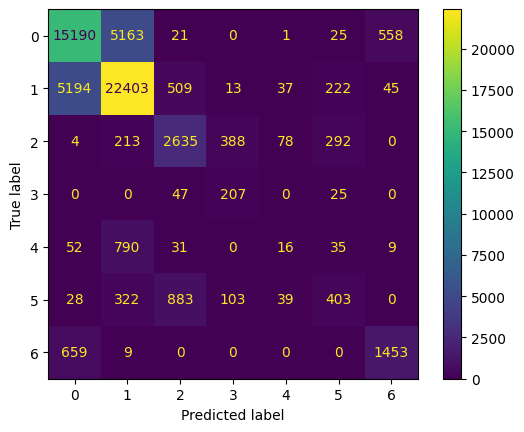

In [ ]:
model_classes['nn'].train_and_test(data_type=DataType.FilterMethod)

### k-最近傍法

-------------------- 0 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.912, recall_score: 0.864, precision_score: 0.903, f1_score: 0.882
accuracy_score: 0.868, recall_score: 0.811, precision_score: 0.852, f1_score: 0.830
-------------------- 1 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.912, recall_score: 0.866, precision_score: 0.905, f1_score: 0.884
accuracy_score: 0.866, recall_score: 0.806, precision_score: 0.846, f1_score: 0.824
-------------------- 2 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.913, recall_score: 0.867, precision_score: 0.907, f1_score: 0.885
accuracy_score: 0.866, recall_score: 0.801, precision_score: 0.850, f1_score: 0.823
-------------------- 3 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.912, recall_score: 0.865, precision_score: 0.904, f1_score: 0.883
accuracy_score: 0.865, recall_score: 0.802, precision_score: 0.851, f1_score: 0.824
-------------------- 4 --------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score: 0.912, recall_score: 0.866, precision_score: 0.906, f1_score: 0.884
accuracy_score: 0.864, recall_score: 0.803, precision_score: 0.848, f1_score: 0.823
-------------------- train result --------------------
[[0
  list([0.9116028570882179, 0.8643641688312554, 0.9030945316443562, 0.8820596878650653])
  list([0.8677305846130309, 0.8114475811071653, 0.8524839522616395, 0.8299580863429971])]
 [1
  list([0.91189688474116, 0.8657637989272592, 0.9054860572272402, 0.8840035173624788])
  list([0.8655217915128799, 0.8062251520407612, 0.8458282263622292, 0.8241102077287932])]
 [2
  list([0.9125829492646919, 0.8668058886558504, 0.9065458845663807, 0.8850645209218362])
  list([0.8655791627622345, 0.8011454664150081, 0.8502710889286998, 0.8233977921449352])]
 [3
  list([0.9117415042741581, 0.8650057426412554, 0.9044314816586152, 0.8831387968206126])
  list([0.8654931058882026, 0.8022910584802343, 0.8508752007541232, 0.8240637800590791])]
 [4
  list([0.9121168078636859, 0.8655820444344

<ipython-input-14-3894cc014044>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.759, recall_score: 0.599, precision_score: 0.610, f1_score: 0.595
saved results (knn) as csv


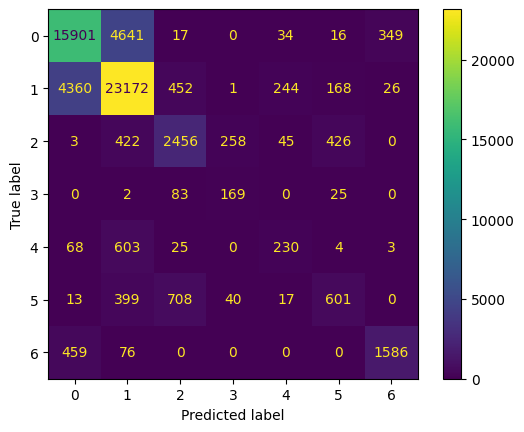

In [ ]:
model_classes['knn'].train_and_test(data_type=DataType.FilterMethod)

## アプローチ4: 3つの機械学習モデルのスタッキングモデルを用いて、特徴量エンジニアリングを行ったデータを説明変数として学習・予測を行う

- アプローチ２のk最近傍法の精度を超えることを目標とする

**スタッキングモデルの構成**

 - 1層目
  - k最近傍法
  - ニューラルネットワーク
  - LightGBM

 - 2層目
  - ランダムフォレスト

In [ ]:
# スタッキングモデル
class MLStackingModel:
  def __init__(self, model_types_first_layer, model_type_second_layer):
    self.models_first_layer = []
    # 1層目のモデルをリストに格納する
    for model_type in model_types_first_layer:
      self.models_first_layer.append(model_instances[model_type])
    # 2層目のモデル
    self.model_second_layer = model_instances[model_type_second_layer]
    # モデルタイプ
    self.model_types_first_layer = model_types_first_layer
    self.model_type_second_layer = model_type_second_layer
    # 予測結果
    self.predictions_first_layer_df = pd.DataFrame()
    self.predictions_second_layer = {}
    self.metrics = {}

  # 訓練関数
  # 引数：モデルインスタンス, 訓練データタイプ（元データor次元圧縮データ）
  # 戻値：各エポックの予測結果、各特徴量の重要度
  def train(self, data_type):
    metric = []

    # データセットのセット
    X_train = datasets[data_type]['X_train']
    y_train = datasets['y_train']

    n_splits = 5
    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1234).split(X_train, y_train))

    for nfold in np.arange(n_splits):
      print('-'*30, nfold, '-'*30)

      # データの分割
      idx_train, idx_val = cv[nfold][0], cv[nfold][1]
      X_tr, y_tr = X_train.loc[idx_train, :], y_train.loc[idx_train, :]
      X_val, y_val = X_train.loc[idx_val, :], y_train.loc[idx_val, :]

      print('X_train shape:', X_tr.shape, 'y_train shape:', y_tr.shape)
      print('X_val shape:', X_val.shape, 'y_val shape:', y_val.shape)

      y_train_preds_fisrt_layer = pd.DataFrame()
      y_val_preds_fisrt_layer = pd.DataFrame()

      # 1層目のモデルの訓練・検証データの予測
      print('-'*17, 'first layer', '-'*17)
      for model, model_type in zip(self.models_first_layer, self.model_types_first_layer):
        print(model_type, ' Training Start.')
        # 訓練
        model.fit(X_tr, y_tr)
        # 予測
        y_tr_pred_fisrt_layer = model.predict(X_tr)
        y_val_pred_fisrt_layer = model.predict(X_val)
        # 予測結果を格納
        y_train_preds_fisrt_layer = pd.concat([y_train_preds_fisrt_layer, pd.DataFrame(y_tr_pred_fisrt_layer)], axis=1)
        y_val_preds_fisrt_layer = pd.concat([y_val_preds_fisrt_layer, pd.DataFrame(y_val_pred_fisrt_layer)], axis=1)
        print(model_type, ' Training Done.')

      # 2層目のモデルの訓練・予測・評価
      print('-'*17, 'second layer', '-'*17)
      self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)
      # 予測
      y_tr_pred_second_layer = self.model_second_layer.predict(y_train_preds_fisrt_layer)
      y_val_pred_second_layer = self.model_second_layer.predict(y_val_preds_fisrt_layer)

      # 予測結果の評価
      metric_train = self.calc_metrics(y_tr, y_tr_pred_second_layer)
      metric_val = self.calc_metrics(y_val, y_val_pred_second_layer)
      metric.append([nfold, metric_train, metric_val])

    print('-'*20, 'train result', '-'*20)
    metric = np.array(metric)
    print(metric)

    print('Training Done.')

    return metric

  # テスト関数
  # 引数： 訓練済みモデルインスタンス, 訓練データタイプ（元データor次元圧縮データ）
  # 戻値： スコア
  def test(self, data_type):
    # データセットをセット
    X_test = datasets[data_type]['X_test']
    y_test = datasets['y_test']
    print('X_test shape:', X_test.shape, 'y_test shape:', y_test.shape)

    y_test_preds_fisrt_layer = pd.DataFrame()

    # 1層目のモデルのテストデータの予測
    print('-'*17, 'first layer', '-'*17)
    for model, model_type in zip(self.models_first_layer, self.model_types_first_layer):
      # 予測
      y_test_pred_fisrt_layer = model.predict(X_test)
      # 予測結果を格納
      y_test_preds_fisrt_layer = pd.concat([y_test_preds_fisrt_layer, pd.DataFrame(y_test_pred_fisrt_layer)], axis=1)

    # 2層目のモデルの予測・評価
    print('-'*17, 'second layer', '-'*17)
    y_pred_second_layer = self.model_second_layer.predict(y_test_preds_fisrt_layer)   # 予測
    score = accuracy_score(y_test, y_pred_second_layer)      # Accuracy Scoreを計算
    print('-'*20, 'test result', '-'*20)

    # 混同行列の表示
    self.show_confusion_matrix(y_test, y_pred_second_layer)

    pred_df = pd.DataFrame(y_pred_second_layer, columns=['pred'])    # 予測結果を保存
    file_name = "_".join(self.model_types_first_layer) + "_" + self.model_type_second_layer + "_" + data_type
    pred_to_csv(pred_df, file_name, "stacking")
    print('-'*20, 'test result', '-'*20)
    metrics = self.calc_metrics(y_test, y_pred_second_layer)      # Accuracy Scoreを計算
    return metrics


  # 学習+テスト
  def train_and_test(self, data_type):
    # 訓練する
    metric = self.train(data_type)
    # 予測する
    pred = self.test(data_type)

    # 結果をCSVで出力
    expanded_data = []
    for row in metric:
        fold = row[0]
        train_metrics = row[1]
        val_metrics = row[2]
        expanded_data.append([fold, 'train', *train_metrics])
        expanded_data.append([fold, 'val', *val_metrics])

    metrics_df = pd.DataFrame(expanded_data, columns=['fold', 'data_type', 'accuracy', 'recall', 'precision', 'f1'])
    test_data_row = pd.DataFrame([[5, 'test', *pred]], columns=['fold', 'data_type', 'accuracy', 'recall', 'precision', 'f1'])
    metrics_df = pd.concat([metrics_df, test_data_row], ignore_index=True)

    # 結果をCSVで出力
    file_name = "_".join(self.model_types_first_layer) + "_" + self.model_type_second_layer + "_" + data_type
    metrics_to_csv(metrics_df, file_name, "stacking")
    print('saved results (' + "stacking" + ') as csv')


  # 評価指標の計算
  def calc_metrics(self, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print('accuracy_score: {:.3f}, recall_score: {:.3f}, precision_score: {:.3f}, f1_score: {:.3f}'.format(accuracy, recall, precision, f1))
    return [accuracy, recall, precision, f1]


  # 混同行列の表示
  def show_confusion_matrix(self, y_true, y_pred):
    print('-'*20, 'Confusion Matrix', '-'*20)
    y_true_array = np.array(y_true["target"])
    cm = confusion_matrix(y_true_array, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


------------------------------ 0 ------------------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


nn  Training Done.
lgb  Training Start.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


lgb  Training Done.
----------------- second layer -----------------


<ipython-input-23-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.820, recall_score: 0.877, precision_score: 0.728, f1_score: 0.747
accuracy_score: 0.781, recall_score: 0.833, precision_score: 0.689, f1_score: 0.708
------------------------------ 1 ------------------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



lgb  Training Done.
----------------- second layer -----------------


<ipython-input-23-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.826, recall_score: 0.876, precision_score: 0.726, f1_score: 0.748
accuracy_score: 0.785, recall_score: 0.826, precision_score: 0.688, f1_score: 0.708
------------------------------ 2 ------------------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


lgb  Training Done.
----------------- second layer -----------------


<ipython-input-23-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.830, recall_score: 0.879, precision_score: 0.729, f1_score: 0.753
accuracy_score: 0.786, recall_score: 0.826, precision_score: 0.690, f1_score: 0.711
------------------------------ 3 ------------------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


nn  Training Done.
lgb  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
lgb  Training Done.
----------------- second layer -----------------


<ipython-input-23-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.893, recall_score: 0.875, precision_score: 0.768, f1_score: 0.806
accuracy_score: 0.850, recall_score: 0.821, precision_score: 0.728, f1_score: 0.761
------------------------------ 4 ------------------------------
X_train shape: (418328, 5) y_train shape: (418328, 1)
X_val shape: (104582, 5) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


lgb  Training Done.
----------------- second layer -----------------


<ipython-input-23-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.818, recall_score: 0.878, precision_score: 0.722, f1_score: 0.747
accuracy_score: 0.775, recall_score: 0.832, precision_score: 0.684, f1_score: 0.706
-------------------- train result --------------------
[[0
  list([0.8200455145244879, 0.8767772166421752, 0.7275305799732902, 0.7474407246995334])
  list([0.7813772924595055, 0.8330069288775795, 0.6891651446603368, 0.7081088743767953])]
 [1
  list([0.8263515710160448, 0.8759635306604386, 0.725657674407089, 0.7483584358713534])
  list([0.7851351092922301, 0.8262573178690849, 0.688056292476001, 0.7081727685436198])]
 [2
  list([0.8298990266011359, 0.8788385135257499, 0.7285439849733683, 0.7526169160232371])
  list([0.7862251630299669, 0.8264939653975494, 0.6895829034170206, 0.7106508819638121])]
 [3
  list([0.89332533323134, 0.8750115370084589, 0.7682261044834079, 0.8061646099211348])
  list([0.84969688856591, 0.8211737539751575, 0.7277440012846853, 0.7607311902341867])]
 [4
  list([0.8180685968904783, 0.877845592714065, 

<ipython-input-23-a940a7c21ad3>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metric = np.array(metric)


----------------- second layer -----------------
-------------------- test result --------------------
-------------------- Confusion Matrix --------------------
-------------------- test result --------------------
accuracy_score: 0.694, recall_score: 0.673, precision_score: 0.555, f1_score: 0.568
saved results (stacking) as csv


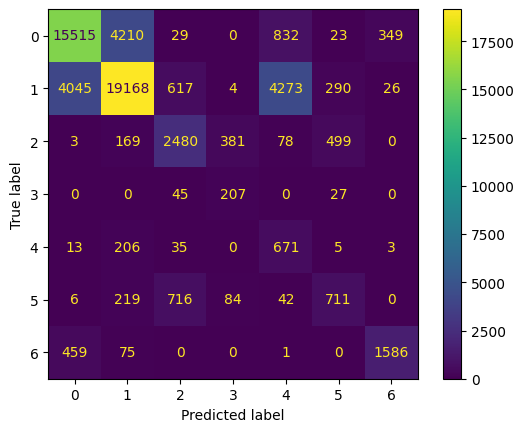

In [ ]:
models_first_layer = ['knn', 'nn', 'lgb']
model_second_layer = 'rf'
myStackingModel = MLStackingModel(models_first_layer, model_second_layer)      # MyStackingModelのインスタンス作成
myStackingModel.train_and_test(DataType.FilterMethod)

In [ ]:
models_first_layer = ['knn', 'nn', 'lgb']
model_second_layer = 'rf'
myStackingModel = MLStackingModel(models_first_layer, model_second_layer)      # MyStackingModelのインスタンス作成
myStackingModel.train_and_test(DataType.Original)

------------------------------ 0 ------------------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
lgb  Training Done.
----------------- second layer -----------------


<ipython-input-24-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.981, recall_score: 0.973, precision_score: 0.933, f1_score: 0.949
accuracy_score: 0.965, recall_score: 0.947, precision_score: 0.908, f1_score: 0.923
------------------------------ 1 ------------------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
lgb  Training Done.
----------------- second layer -----------------


<ipython-input-24-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.982, recall_score: 0.972, precision_score: 0.937, f1_score: 0.950
accuracy_score: 0.965, recall_score: 0.942, precision_score: 0.912, f1_score: 0.922
------------------------------ 2 ------------------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
lgb  Training Done.
----------------- second layer -----------------


<ipython-input-24-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.979, recall_score: 0.972, precision_score: 0.921, f1_score: 0.942
accuracy_score: 0.962, recall_score: 0.943, precision_score: 0.902, f1_score: 0.919
------------------------------ 3 ------------------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nn  Training Done.
lgb  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
lgb  Training Done.
----------------- second layer -----------------


<ipython-input-24-a940a7c21ad3>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model_second_layer.fit(y_train_preds_fisrt_layer, y_tr)


accuracy_score: 0.981, recall_score: 0.972, precision_score: 0.927, f1_score: 0.945
accuracy_score: 0.964, recall_score: 0.948, precision_score: 0.906, f1_score: 0.922
------------------------------ 4 ------------------------------
X_train shape: (418328, 54) y_train shape: (418328, 1)
X_val shape: (104582, 54) y_val shape: (104582, 1)
----------------- first layer -----------------
knn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn  Training Done.
nn  Training Start.


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
